# 1. Comprensión de datos

In [75]:
# Dependencias
# pip install pandas
# pip install pyarrow
# pip install numpy
# pip install matplotlib
# pip install seaborn
# pip install scikit-learn


In [110]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans


## Preparar el data set inicial

In [77]:
# Ruta de los .parquet
DATA_PATH = "datos_examen"

# Cargar tabla principal (application)
app = pd.read_parquet(os.path.join(DATA_PATH, "application_train.parquet"))

print("\nDataset application_train cargado correctamente.")
print("Dimensiones:", app.shape)

app.head()


Dataset application_train cargado correctamente.
Dimensiones: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Descripción de los datos

In [78]:
# Mostrar dimensiones del dataset
print("Dimensiones del dataset (filas, columnas):", app.shape)

# Mostrar nombres de columnas
print("\nLista de columnas:")
for col in app.columns:
    print("-", col)

# Tipos de datos por columna
print("\nTipos de datos:")
print(app.dtypes.value_counts())

print("\nPrimeras 15 columnas con su tipo:")
print(app.dtypes.head(15))

Dimensiones del dataset (filas, columnas): (307511, 122)

Lista de columnas:
- SK_ID_CURR
- TARGET
- NAME_CONTRACT_TYPE
- CODE_GENDER
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- CNT_CHILDREN
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- AMT_GOODS_PRICE
- NAME_TYPE_SUITE
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- REGION_POPULATION_RELATIVE
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_REGISTRATION
- DAYS_ID_PUBLISH
- OWN_CAR_AGE
- FLAG_MOBIL
- FLAG_EMP_PHONE
- FLAG_WORK_PHONE
- FLAG_CONT_MOBILE
- FLAG_PHONE
- FLAG_EMAIL
- OCCUPATION_TYPE
- CNT_FAM_MEMBERS
- REGION_RATING_CLIENT
- REGION_RATING_CLIENT_W_CITY
- WEEKDAY_APPR_PROCESS_START
- HOUR_APPR_PROCESS_START
- REG_REGION_NOT_LIVE_REGION
- REG_REGION_NOT_WORK_REGION
- LIVE_REGION_NOT_WORK_REGION
- REG_CITY_NOT_LIVE_CITY
- REG_CITY_NOT_WORK_CITY
- LIVE_CITY_NOT_WORK_CITY
- ORGANIZATION_TYPE
- EXT_SOURCE_1
- EXT_SOURCE_2
- EXT_SOURCE_3
- APARTMENTS_AVG
- BASEMENTAREA_AVG
- YEARS_BEGINEXPLUATATION_AVG
- YEARS_BUIL

In [79]:
# Información general del dataset
print("\nInformación general del dataset:")
app.info()



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [80]:
# Columnas categóricas
categoricas = app.select_dtypes(include=['object']).columns
print("\nNúmero de columnas categóricas:", len(categoricas))
print("Columnas categóricas:", list(categoricas))

# Mostrar valor único de las primeras categóricas
for col in categoricas[:5]:
    print(f"\nValores únicos de la columna '{col}':")
    print(app[col].unique()[:10])  # primeros 10 para no saturar



Número de columnas categóricas: 16
Columnas categóricas: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

Valores únicos de la columna 'NAME_CONTRACT_TYPE':
['Cash loans' 'Revolving loans']

Valores únicos de la columna 'CODE_GENDER':
['M' 'F' 'XNA']

Valores únicos de la columna 'FLAG_OWN_CAR':
['N' 'Y']

Valores únicos de la columna 'FLAG_OWN_REALTY':
['Y' 'N']

Valores únicos de la columna 'NAME_TYPE_SUITE':
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' None
 'Other_B' 'Group of people']


In [81]:
# Columnas numéricas
numericas = app.select_dtypes(include=['int64', 'float64']).columns
print("\nNúmero de columnas numéricas:", len(numericas))

print("\Resumen estadística:")
display(app[numericas].describe().T.head(10))



Número de columnas numéricas: 106
\Resumen estadística:


<>:5: SyntaxWarning: "\R" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\R"? A raw string is also an option.
<>:5: SyntaxWarning: "\R" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\R"? A raw string is also an option.
C:\Users\eches\AppData\Local\Temp\ipykernel_11992\1829607349.py:5: SyntaxWarning: "\R" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\R"? A raw string is also an option.
  print("\Resumen estadística:")


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.00000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.00000,-19682.000000,-15750.00000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.00000,-2760.000000,-1213.00000,-289.000000,3.652430e+05


## Análisis inicial

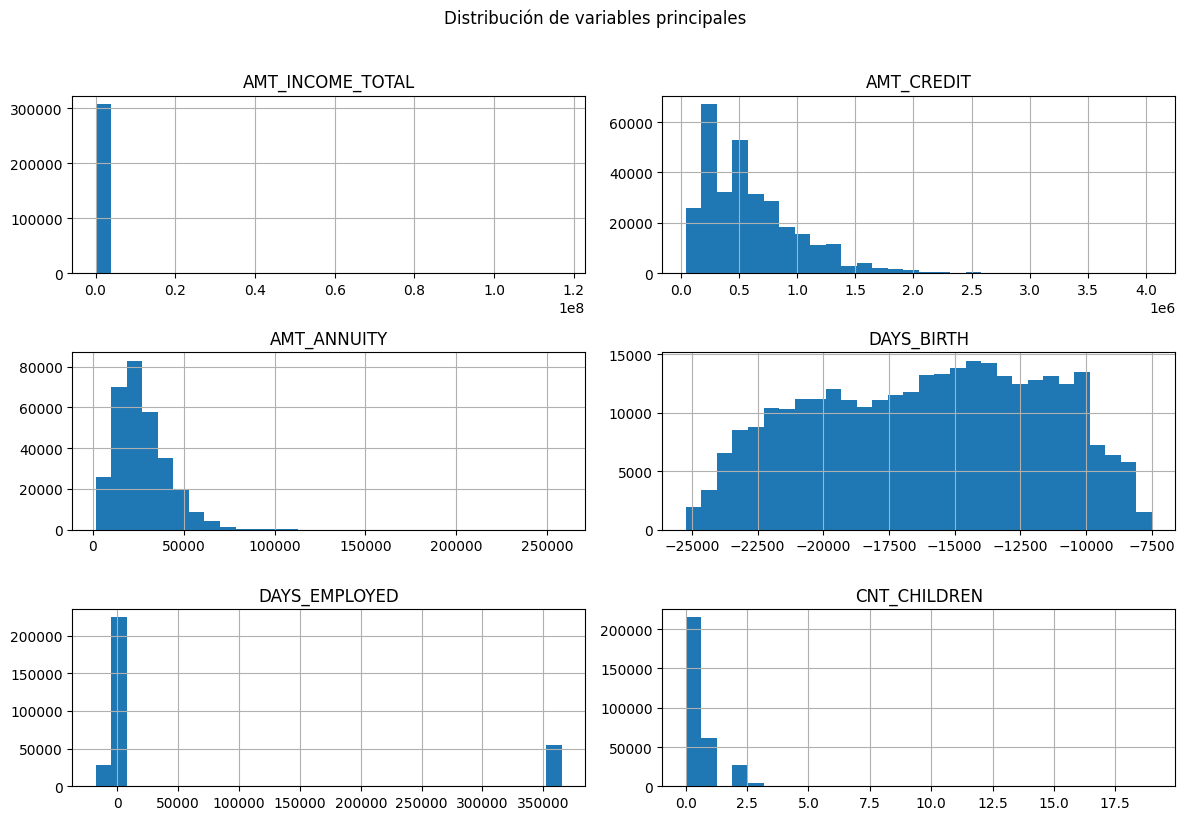

In [82]:
# Visualización de distribuciones de variables principales
vars_explorar = [
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "CNT_CHILDREN"
]

app[vars_explorar].hist(figsize=(12,8), bins=30)
plt.suptitle("Distribución de variables principales", y=1.02)
plt.tight_layout()
plt.show()

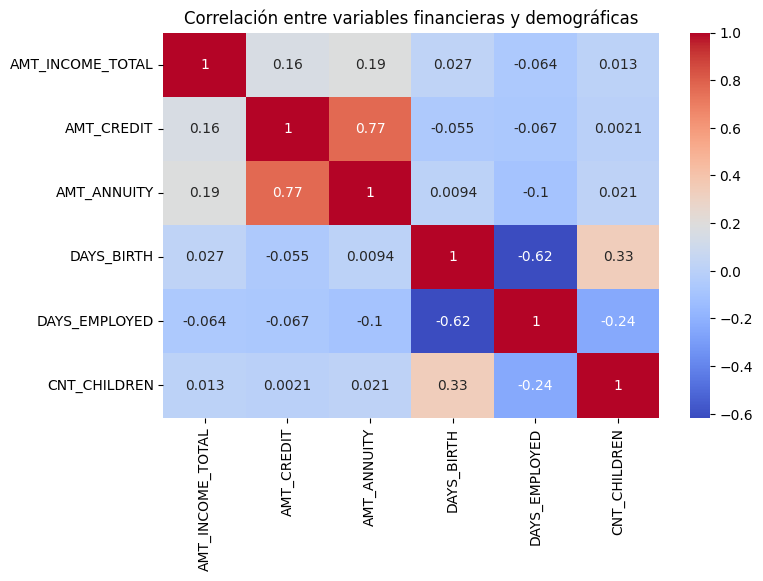

In [83]:
# Matriz de correlación
corr = app[vars_explorar].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlación entre variables financieras y demográficas")
plt.show()

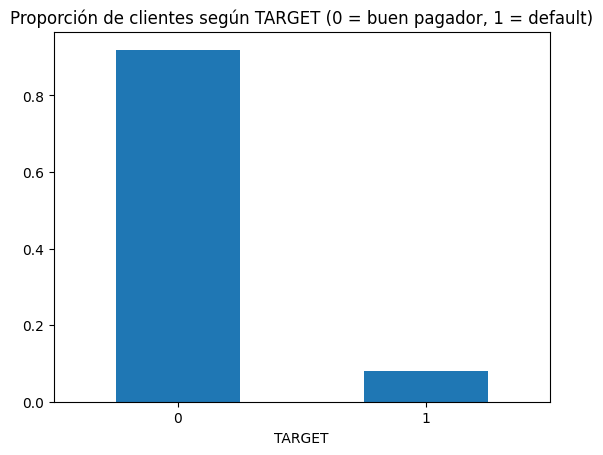

In [84]:
# Análisis de la variable TARGET
app["TARGET"].value_counts(normalize=True).plot(kind="bar")
plt.title("Proporción de clientes según TARGET (0 = buen pagador, 1 = default)")
plt.xticks(rotation=0)
plt.show()

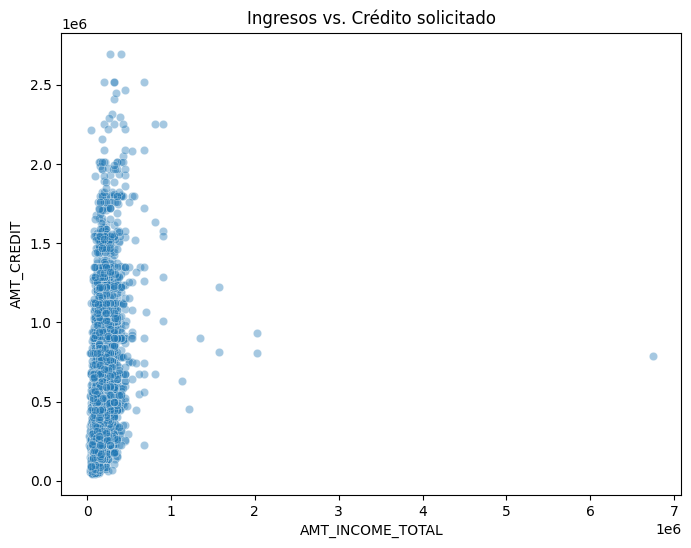

In [85]:
# Relación entre ingresos y monto de crédito solicitado
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=app.sample(5000), 
    x="AMT_INCOME_TOTAL", 
    y="AMT_CREDIT",
    alpha=0.4
)
plt.title("Ingresos vs. Crédito solicitado")
plt.show()

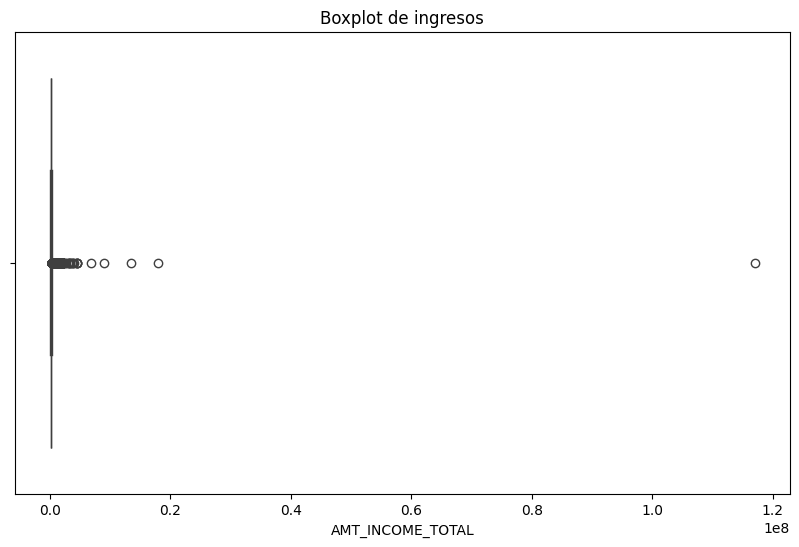

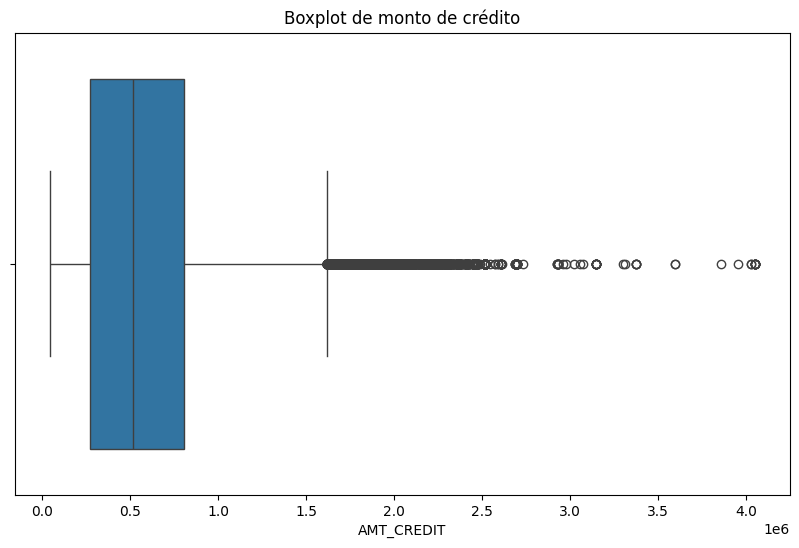

In [86]:
# Boxplots para detectar outlierss
plt.figure(figsize=(10,6))
sns.boxplot(x=app["AMT_INCOME_TOTAL"])
plt.title("Boxplot de ingresos")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x=app["AMT_CREDIT"])
plt.title("Boxplot de monto de crédito")
plt.show()

In [87]:
# Análisis de valores únicos en DAYS_EMPLOYED

# 365243 suele representar 'no trabaja'
print("Valores únicos más comunes en DAYS_EMPLOYED:")
print(app["DAYS_EMPLOYED"].value_counts().head())

Valores únicos más comunes en DAYS_EMPLOYED:
DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64


## Calidad de los datos

In [88]:
# Calidad de los datos
nulls = app.isnull().sum().sort_values(ascending=False)
percent_nulls = (app.isnull().mean() * 100).sort_values(ascending=False)

print("Columnas con más valores nulos:")
display(pd.DataFrame({
    "Nulos": nulls,
    "% Nulos": percent_nulls
}).head(20))

Columnas con más valores nulos:


,Nulos,% Nulos
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953


In [89]:
# Columnas con más del 40% de nulo
high_nulls = percent_nulls[percent_nulls > 40]
print("Columnas con más de 40% de valores nulos:")
display(high_nulls)

Columnas con más de 40% de valores nulos:


COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
EXT_SOURCE_1                    56

In [90]:
# Valores especiales o fuera de rango

# Revisar frecuencia del valor anómalo en DAYS_EMPLOYED
print("Valores más frecuentes en DAYS_EMPLOYED:")
print(app["DAYS_EMPLOYED"].value_counts().head())

anomalia = (app["DAYS_EMPLOYED"] == 365243).sum()
print("\nCantidad de filas con valor 365243:", anomalia)

Valores más frecuentes en DAYS_EMPLOYED:
DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
Name: count, dtype: int64

Cantidad de filas con valor 365243: 55374


In [91]:
# Filas duplicadas
duplicates = app.duplicated().sum()
print("Número de filas duplicadas:", duplicates)

Número de filas duplicadas: 0


In [92]:
# Resumen estadístico de variables clave
vars_rango = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "CNT_CHILDREN"]

print(app[vars_rango].describe())

       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY   CNT_CHILDREN
count      3.075110e+05  3.075110e+05  307499.000000  307511.000000
mean       1.687979e+05  5.990260e+05   27108.573909       0.417052
std        2.371231e+05  4.024908e+05   14493.737315       0.722121
min        2.565000e+04  4.500000e+04    1615.500000       0.000000
25%        1.125000e+05  2.700000e+05   16524.000000       0.000000
50%        1.471500e+05  5.135310e+05   24903.000000       0.000000
75%        2.025000e+05  8.086500e+05   34596.000000       1.000000
max        1.170000e+08  4.050000e+06  258025.500000      19.000000


In [93]:
# Valores imposibles o fuera de rango

# Edad en días -> Edad positiva en años
min_days = app["DAYS_BIRTH"].min()
max_days = app["DAYS_BIRTH"].max()

print("Rango de DAYS_BIRTH (en días):", min_days, "/", max_days)

# Convertir a años positivos
min_years = round(abs(min_days) / 365, 1)
max_years = round(abs(max_days) / 365, 1)

print("Rango de edad aproximado (en años):", min_years, "años /", max_years, "años")


Rango de DAYS_BIRTH (en días): -25229 / -7489
Rango de edad aproximado (en años): 69.1 años / 20.5 años


In [94]:
# Valores únicos en columnas categóricas
categoricas = app.select_dtypes(include=['object']).columns

for col in categoricas:
    print(f"\nColumna: {col}")
    print("Valores únicos:", app[col].unique())


Columna: NAME_CONTRACT_TYPE
Valores únicos: ['Cash loans' 'Revolving loans']

Columna: CODE_GENDER
Valores únicos: ['M' 'F' 'XNA']

Columna: FLAG_OWN_CAR
Valores únicos: ['N' 'Y']

Columna: FLAG_OWN_REALTY
Valores únicos: ['Y' 'N']

Columna: NAME_TYPE_SUITE
Valores únicos: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' None
 'Other_B' 'Group of people']

Columna: NAME_INCOME_TYPE
Valores únicos: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Columna: NAME_EDUCATION_TYPE
Valores únicos: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Columna: NAME_FAMILY_STATUS
Valores únicos: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

Columna: NAME_HOUSING_TYPE
Valores únicos: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

Columna: OCCUPATIO

In [95]:
# Columas con un solo valor
one_value_cols = [c for c in app.columns if app[c].nunique() <= 1]
print("Columnas con un solo valor:", one_value_cols)

Columnas con un solo valor: []


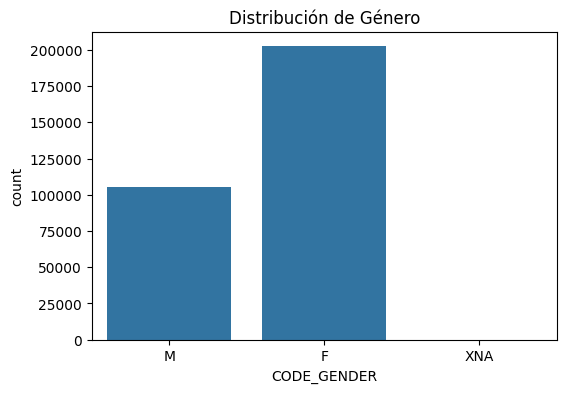


Distribución porcentual de CODE_GENDER:
CODE_GENDER
F      65.834393
M      34.164306
XNA     0.001301
Name: proportion, dtype: float64


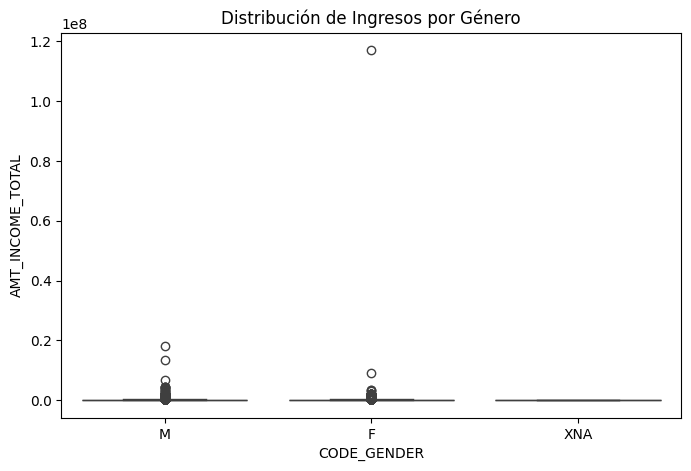


Tasa de default por género (%)
CODE_GENDER
F       6.999328
M      10.141920
XNA     0.000000
Name: TARGET, dtype: float64


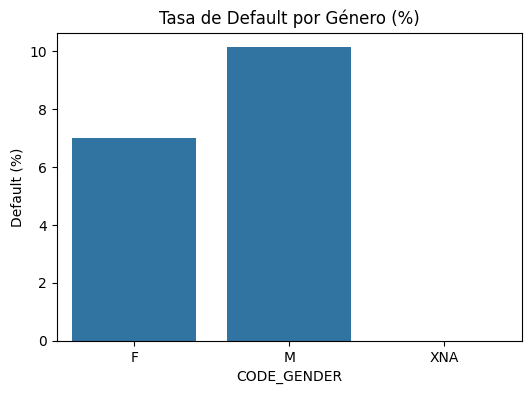

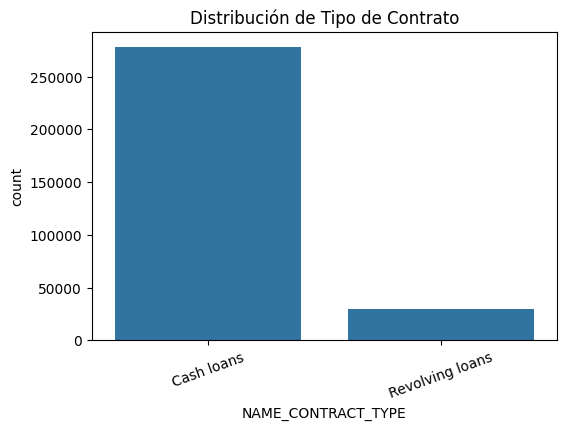


Distribución porcentual de NAME_CONTRACT_TYPE:
NAME_CONTRACT_TYPE
Cash loans         90.478715
Revolving loans     9.521285
Name: proportion, dtype: float64

Tasa de default por tipo de contrato (%)
NAME_CONTRACT_TYPE
Cash loans         8.345913
Revolving loans    5.478329
Name: TARGET, dtype: float64


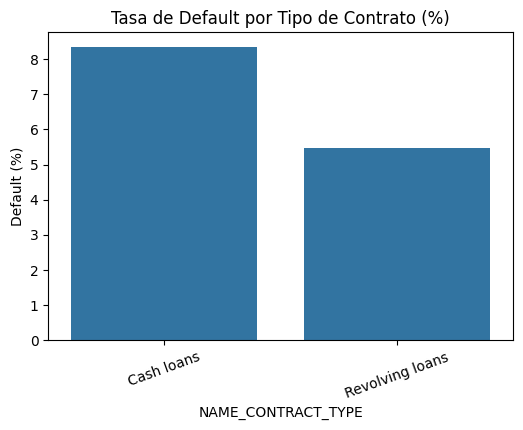

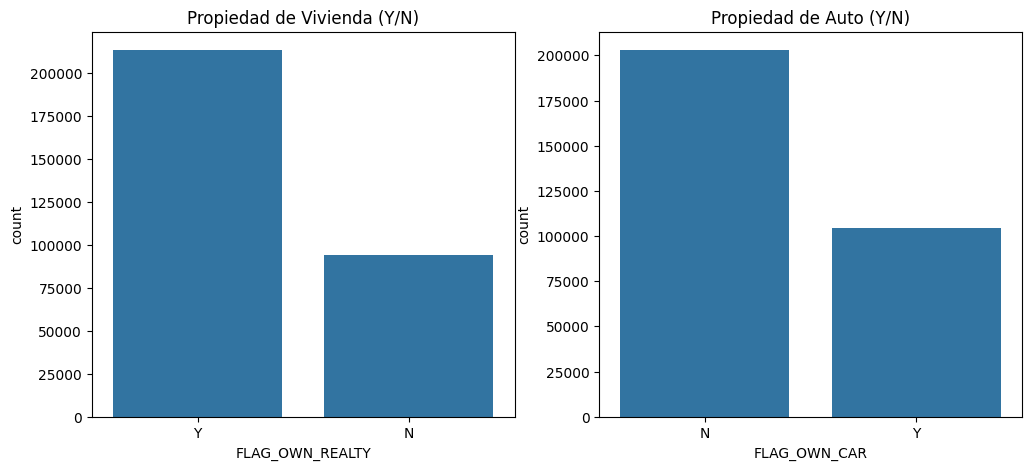


Default según propiedad de auto (%)
FLAG_OWN_CAR
N    8.500227
Y    7.243730
Name: TARGET, dtype: float64


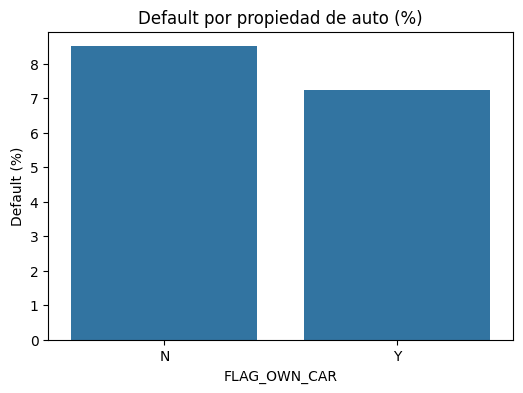


Default según propiedad de vivienda (%)
FLAG_OWN_REALTY
N    8.324929
Y    7.961577
Name: TARGET, dtype: float64


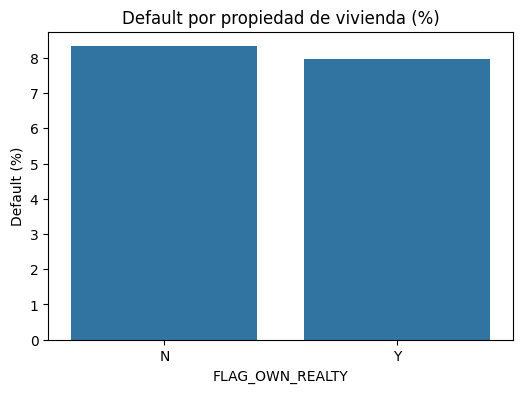

In [96]:
# Análisis de sesgos potenciales

# ---------------------------
# 1. SESGO EN GÉNERO
# ---------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=app, x="CODE_GENDER")
plt.title("Distribución de Género")
plt.show()

print("\nDistribución porcentual de CODE_GENDER:")
print(app["CODE_GENDER"].value_counts(normalize=True) * 100)


# ---------------------------
# 2. INGRESOS POR GÉNERO
# ---------------------------
plt.figure(figsize=(8,5))
sns.boxplot(data=app, x="CODE_GENDER", y="AMT_INCOME_TOTAL")
plt.title("Distribución de Ingresos por Género")
plt.show()


# ---------------------------
# 3. DEFAULT SEGÚN GÉNERO
# ---------------------------
default_genero = app.groupby("CODE_GENDER")["TARGET"].mean() * 100
print("\nTasa de default por género (%)")
print(default_genero)

plt.figure(figsize=(6,4))
sns.barplot(x=default_genero.index, y=default_genero.values)
plt.title("Tasa de Default por Género (%)")
plt.ylabel("Default (%)")
plt.show()


# ---------------------------
# 4. SESGO EN TIPO DE CONTRATO
# ---------------------------
plt.figure(figsize=(6,4))
sns.countplot(data=app, x="NAME_CONTRACT_TYPE")
plt.title("Distribución de Tipo de Contrato")
plt.xticks(rotation=20)
plt.show()

print("\nDistribución porcentual de NAME_CONTRACT_TYPE:")
print(app["NAME_CONTRACT_TYPE"].value_counts(normalize=True) * 100)


# ---------------------------
# 5. DEFAULT SEGÚN TIPO DE CONTRATO
# ---------------------------
default_contrato = app.groupby("NAME_CONTRACT_TYPE")["TARGET"].mean() * 100
print("\nTasa de default por tipo de contrato (%)")
print(default_contrato)

plt.figure(figsize=(6,4))
sns.barplot(x=default_contrato.index, y=default_contrato.values)
plt.title("Tasa de Default por Tipo de Contrato (%)")
plt.ylabel("Default (%)")
plt.xticks(rotation=20)
plt.show()


# ---------------------------
# 6. PROPIEDAD DE VIVIENDA Y AUTO
# ---------------------------
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.countplot(data=app, x="FLAG_OWN_REALTY", ax=axes[0])
axes[0].set_title("Propiedad de Vivienda (Y/N)")

sns.countplot(data=app, x="FLAG_OWN_CAR", ax=axes[1])
axes[1].set_title("Propiedad de Auto (Y/N)")

plt.show()


# ---------------------------
# 7. DEFAULT SEGÚN PROPIEDAD DEL AUTO
# ---------------------------
default_auto = app.groupby("FLAG_OWN_CAR")["TARGET"].mean() * 100
print("\nDefault según propiedad de auto (%)")
print(default_auto)

plt.figure(figsize=(6,4))
sns.barplot(x=default_auto.index, y=default_auto.values)
plt.title("Default por propiedad de auto (%)")
plt.ylabel("Default (%)")
plt.show()


# ---------------------------
# 8. DEFAULT SEGÚN PROPIEDAD DE VIVIENDA
# ---------------------------
default_realty = app.groupby("FLAG_OWN_REALTY")["TARGET"].mean() * 100
print("\nDefault según propiedad de vivienda (%)")
print(default_realty)

plt.figure(figsize=(6,4))
sns.barplot(x=default_realty.index, y=default_realty.values)
plt.title("Default por propiedad de vivienda (%)")
plt.ylabel("Default (%)")
plt.show()


Rango de DAYS_BIRTH (en días): -25229 / -7489
Rango de edad aproximado (en años): 20.5 años / 69.1 años


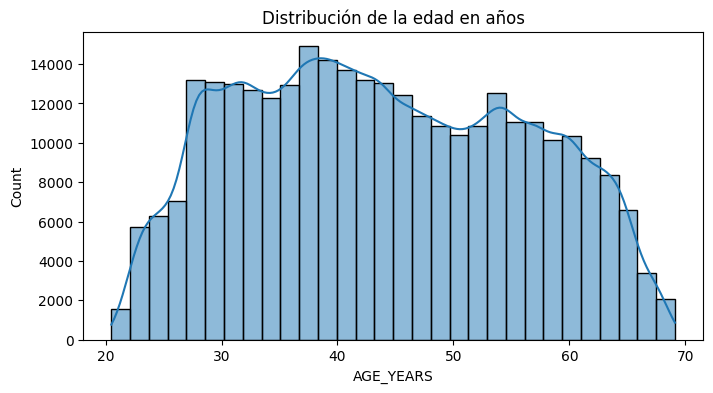


Registros con DAYS_EMPLOYED = 365243 (valor inválido): 55374


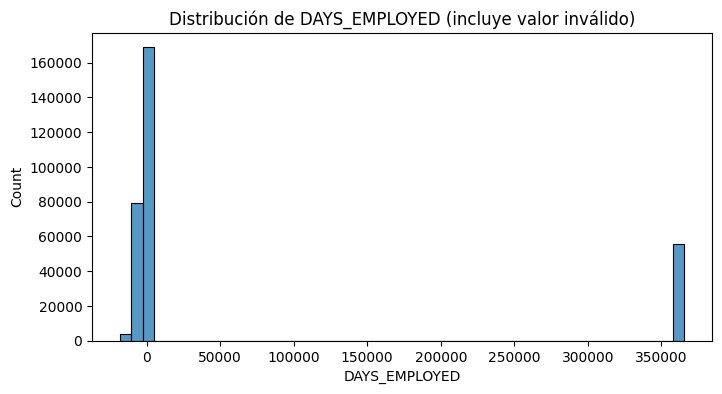


Registros donde los años trabajados superan la edad: 0

Rango DAYS_REGISTRATION: -24672.0 / 0.0


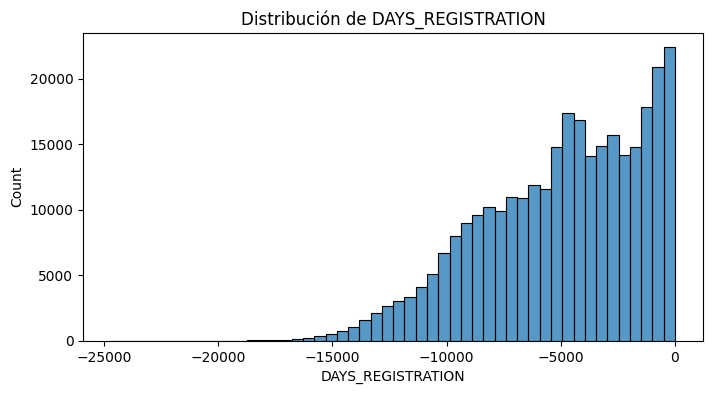


Rango DAYS_LAST_PHONE_CHANGE: -4292.0 / 0.0


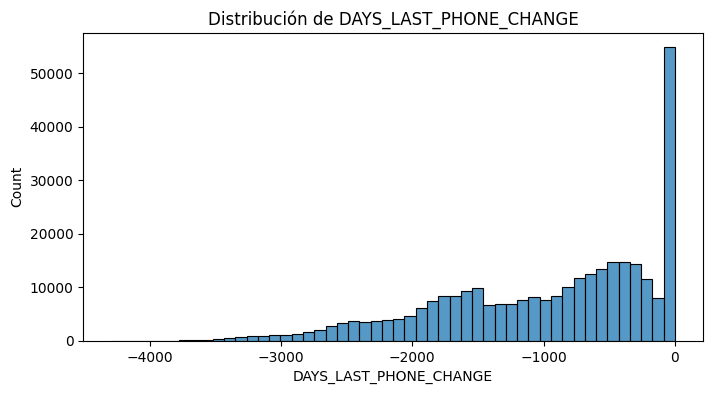

In [97]:
# Análisis de valores fuera de rango o inconsistentes

# ------------------------------------------------
# 1. EDAD (DAYS_BIRTH) -> convertir a años positivos
# ------------------------------------------------
app["AGE_YEARS"] = (-app["DAYS_BIRTH"] / 365).round(1)

print("Rango de DAYS_BIRTH (en días):",
      app["DAYS_BIRTH"].min(), "/", app["DAYS_BIRTH"].max())

print("Rango de edad aproximado (en años):",
      app["AGE_YEARS"].min(), "años /", app["AGE_YEARS"].max(), "años")

plt.figure(figsize=(8,4))
sns.histplot(app["AGE_YEARS"], bins=30, kde=True)
plt.title("Distribución de la edad en años")
plt.show()


# ------------------------------------------------
# 2. DÍAS DE EMPLEO (DAYS_EMPLOYED)
# ------------------------------------------------
anom_emp = (app["DAYS_EMPLOYED"] == 365243).sum()
print("\nRegistros con DAYS_EMPLOYED = 365243 (valor inválido):", anom_emp)

plt.figure(figsize=(8,4))
sns.histplot(app["DAYS_EMPLOYED"], bins=50)
plt.title("Distribución de DAYS_EMPLOYED (incluye valor inválido)")
plt.show()


# ------------------------------------------------
# 3. COMPARACIÓN: AÑOS DE EMPLEO > AÑOS DE EDAD
# ------------------------------------------------
app["EMPLOYED_YEARS"] = (-app["DAYS_EMPLOYED"] / 365)

# registros donde el empleo supera la edad (inconsistencia lógica)
inconsistentes = app[app["EMPLOYED_YEARS"] > app["AGE_YEARS"]]
print("\nRegistros donde los años trabajados superan la edad:", len(inconsistentes))


# ------------------------------------------------
# 4. FECHA DE REGISTRO (DAYS_REGISTRATION)
# ------------------------------------------------
print("\nRango DAYS_REGISTRATION:",
      app["DAYS_REGISTRATION"].min(),
      "/",
      app["DAYS_REGISTRATION"].max())

plt.figure(figsize=(8,4))
sns.histplot(app["DAYS_REGISTRATION"], bins=50)
plt.title("Distribución de DAYS_REGISTRATION")
plt.show()


# ------------------------------------------------
# 5. FECHA ÚLTIMO CAMBIO DE TELÉFONO
# ------------------------------------------------
print("\nRango DAYS_LAST_PHONE_CHANGE:",
      app["DAYS_LAST_PHONE_CHANGE"].min(),
      "/",
      app["DAYS_LAST_PHONE_CHANGE"].max())

plt.figure(figsize=(8,4))
sns.histplot(app["DAYS_LAST_PHONE_CHANGE"], bins=50)
plt.title("Distribución de DAYS_LAST_PHONE_CHANGE")
plt.show()

In [98]:
# Resumen de problemas detectados
print("\n=== Resumen de problemas detectados ===")
print("Columnas con altos nulos:", len(high_nulls))
print("Columnas con un solo valor:", len(one_value_cols))
print("Duplicados:", duplicates)
print("DAYS_EMPLOYED anomalías:", anomalia)



=== Resumen de problemas detectados ===
Columnas con altos nulos: 49
Columnas con un solo valor: 0
Duplicados: 0
DAYS_EMPLOYED anomalías: 55374


# 2. Preparación de los datos

In [99]:
# Seleccion de datos para modelado

# 1. Excluir columnas problemáticas detectadas en EDA
# ----------------------------------------------------
# - high_nulls: columnas con demasiados nulos -> poco útiles
# - No hay columnas con un solo valor
# - TARGET no se usa en clustering
# - SK_ID_CURR es solo un identificador
cols_excluir = list(high_nulls.index) + ["TARGET", "SK_ID_CURR"]

# Dataset sin columnas excluidas
app_sel = app.drop(columns=cols_excluir, errors="ignore")


# 2. Variables numéricas seleccionadas
# -----------------------------------------------------
# Seleccionamos variables que:
# - Tienen buena distribución según los gráficos
# - No fueron marcadas como problemáticas
# - Representan bien perfil económico/demográfico
vars_numericas = [
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "CNT_CHILDREN",
    "CNT_FAM_MEMBERS",
    "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
    "DAYS_BIRTH",              # luego se convertirá a edad
    "DAYS_EMPLOYED",           # corregiremos 365243
    "DAYS_REGISTRATION",       
    "DAYS_LAST_PHONE_CHANGE"   
]

# Filtrar por si alguna columna no existe después de excluir nulos
vars_numericas = [v for v in vars_numericas if v in app_sel.columns]


# 3. Variables categóricas seleccionadas
# -----------------------------------------------------
# Estas mostraron sesgos importantes y relevancia social:
vars_categoricas = [
    "NAME_CONTRACT_TYPE",
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "NAME_EDUCATION_TYPE",
    "NAME_INCOME_TYPE",
    "NAME_FAMILY_STATUS"
]

vars_categoricas = [v for v in vars_categoricas if v in app_sel.columns]


# 4. Dataset final SELECTED DATA
# -----------------------------------------------------
selected_columns = vars_numericas + vars_categoricas

data_selected = app_sel[selected_columns].copy()

print("Dimensiones del dataset seleccionado:", data_selected.shape)
data_selected.head()


Dimensiones del dataset seleccionado: (307511, 18)


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CNT_CHILDREN,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS
0,202500.0,406597.5,24700.5,0,1.0,0.262949,0.139376,-9461,-637,-3648.0,-1134.0,Cash loans,M,N,Y,Secondary / secondary special,Working,Single / not married
1,270000.0,1293502.5,35698.5,0,2.0,0.622246,NaN,-16765,-1188,-1186.0,-828.0,Cash loans,F,N,N,Higher education,State servant,Married
2,67500.0,135000.0,6750.0,0,1.0,0.555912,0.729567,-19046,-225,-4260.0,-815.0,Revolving loans,M,Y,Y,Secondary / secondary special,Working,Single / not married
3,135000.0,312682.5,29686.5,0,2.0,0.650442,NaN,-19005,-3039,-9833.0,-617.0,Cash loans,F,N,Y,Secondary / secondary special,Working,Civil marriage
4,121500.0,513000.0,21865.5,0,1.0,0.322738,NaN,-19932,-3038,-4311.0,-1106.0,Cash loans,M,N,Y,Secondary / secondary special,Working,Single / not married


Anomalías antes de corregir: 55374
Anomalías después de corregir: 0


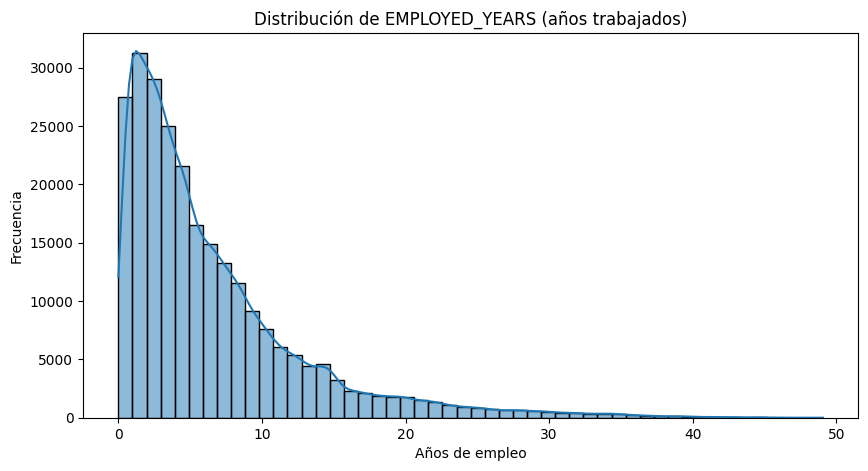


Estadísticas EMPLOYED_YEARS:


count    252137.000000
mean          6.531975
std           6.406458
min          -0.000000
25%           2.100000
50%           4.520000
75%           8.700000
max          49.070000
Name: EMPLOYED_YEARS, dtype: float64

In [100]:
# Análisis y corrección de DAYS_EMPLOYED

# 1. Reemplazar anómalia 365243 por NaN
anom_before = (app["DAYS_EMPLOYED"] == 365243).sum()
print("Anomalías antes de corregir:", anom_before)

app.loc[app["DAYS_EMPLOYED"] == 365243, "DAYS_EMPLOYED"] = np.nan

anom_after = (app["DAYS_EMPLOYED"] == 365243).sum()
print("Anomalías después de corregir:", anom_after)

# 2. Crear EMPLOYED_YEARS
app["EMPLOYED_YEARS"] = (-app["DAYS_EMPLOYED"] / 365).round(2)

# 3. Comprobar visualmente
plt.figure(figsize=(10,5))
sns.histplot(app["EMPLOYED_YEARS"], bins=50, kde=True)
plt.title("Distribución de EMPLOYED_YEARS (años trabajados)")
plt.xlabel("Años de empleo")
plt.ylabel("Frecuencia")
plt.grid(False)
plt.show()

# 4. Mostrar estadísticas básicas
print("\nEstadísticas EMPLOYED_YEARS:")
display(app["EMPLOYED_YEARS"].describe())

Rango de AGE_YEARS:
Edad mínima: 20.5
Edad máxima: 69.1


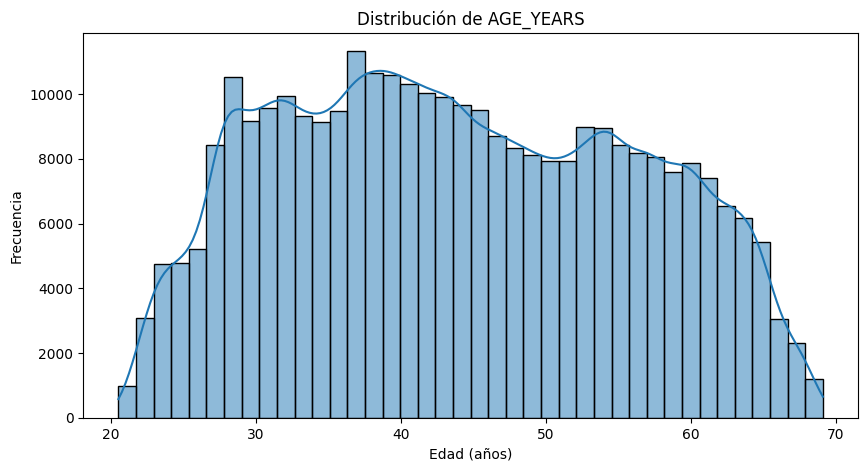

count    307511.000000
mean         43.936992
std          11.956084
min          20.500000
25%          34.000000
50%          43.200000
75%          53.900000
max          69.100000
Name: AGE_YEARS, dtype: float64

In [101]:
# Análisis y conversión de DAYS_BIRTH a AGE_YEARS

# Convertir días negativos a años positivos
app["AGE_YEARS"] = (-app["DAYS_BIRTH"] / 365).round(1)

# Comprobación rápida
print("Rango de AGE_YEARS:")
print("Edad mínima:", app["AGE_YEARS"].min())
print("Edad máxima:", app["AGE_YEARS"].max())

# Visualización
plt.figure(figsize=(10,5))
sns.histplot(app["AGE_YEARS"], bins=40, kde=True)
plt.title("Distribución de AGE_YEARS")
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia")
plt.grid(False)
plt.show()

# Estadísticas básicas
display(app["AGE_YEARS"].describe())

Rango de REGISTRATION_YEARS:
-0.0 → 67.59


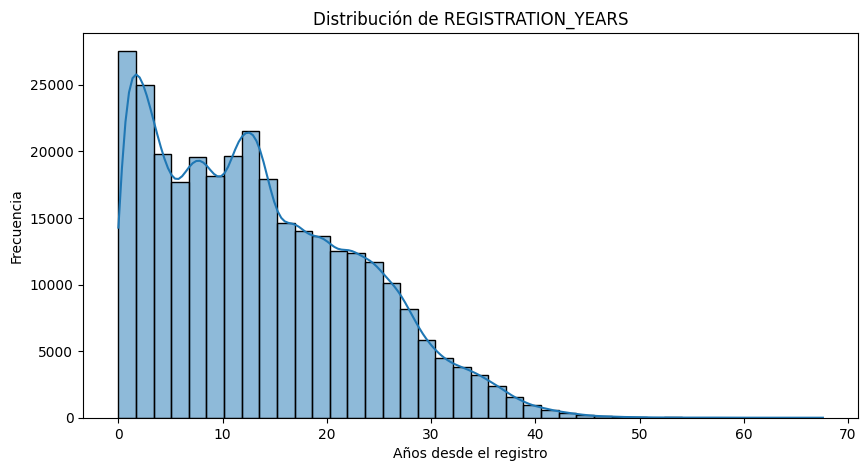


Rango de PHONE_CHANGE_YEARS:
-0.0 → 11.76


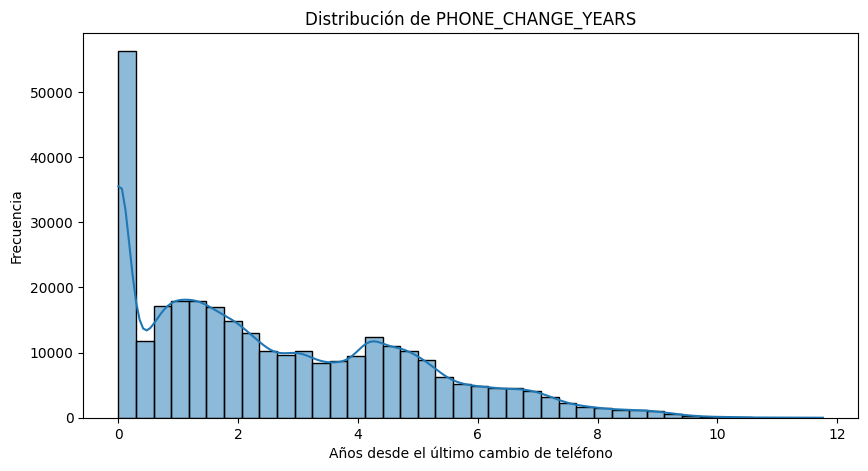


=== Estadísticas REGISTRATION_YEARS ===


count    307511.000000
mean         13.660596
std           9.651742
min          -0.000000
25%           5.510000
50%          12.340000
75%          20.490000
max          67.590000
Name: REGISTRATION_YEARS, dtype: float64


=== Estadísticas PHONE_CHANGE_YEARS ===


count    307510.000000
mean          2.637973
std           2.265221
min          -0.000000
25%           0.750000
50%           2.070000
75%           4.300000
max          11.760000
Name: PHONE_CHANGE_YEARS, dtype: float64

In [102]:
# Transformación de DAYS_REGISTRATION y DAYS_LAST_PHONE_CHANGE

# 1. Registro del cliente (DAYS_REGISTRATION)
app["REGISTRATION_YEARS"] = (-app["DAYS_REGISTRATION"] / 365).round(2)

print("Rango de REGISTRATION_YEARS:")
print(app["REGISTRATION_YEARS"].min(), "→", app["REGISTRATION_YEARS"].max())

plt.figure(figsize=(10,5))
sns.histplot(app["REGISTRATION_YEARS"], bins=40, kde=True)
plt.title("Distribución de REGISTRATION_YEARS")
plt.xlabel("Años desde el registro")
plt.ylabel("Frecuencia")
plt.grid(False)
plt.show()


# 2. Último cambio de teléfono (DAYS_LAST_PHONE_CHANGE)
app["PHONE_CHANGE_YEARS"] = (-app["DAYS_LAST_PHONE_CHANGE"] / 365).round(2)

print("\nRango de PHONE_CHANGE_YEARS:")
print(app["PHONE_CHANGE_YEARS"].min(), "→", app["PHONE_CHANGE_YEARS"].max())

plt.figure(figsize=(10,5))
sns.histplot(app["PHONE_CHANGE_YEARS"], bins=40, kde=True)
plt.title("Distribución de PHONE_CHANGE_YEARS")
plt.xlabel("Años desde el último cambio de teléfono")
plt.ylabel("Frecuencia")
plt.grid(False)
plt.show()


# 3. Estadísticas rápidas
print("\n=== Estadísticas REGISTRATION_YEARS ===")
display(app["REGISTRATION_YEARS"].describe())

print("\n=== Estadísticas PHONE_CHANGE_YEARS ===")
display(app["PHONE_CHANGE_YEARS"].describe())


=== Cantidad de nulos por variable ===


EXT_SOURCE_1           173378
EXT_SOURCE_3            60965
EMPLOYED_YEARS          55374
EXT_SOURCE_2              660
AMT_ANNUITY                12
CNT_FAM_MEMBERS             2
PHONE_CHANGE_YEARS          1
AMT_CREDIT                  0
AMT_INCOME_TOTAL            0
AGE_YEARS                   0
CNT_CHILDREN                0
REGISTRATION_YEARS          0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
NAME_EDUCATION_TYPE         0
NAME_INCOME_TYPE            0
NAME_FAMILY_STATUS          0
dtype: int64


=== Porcentaje de nulos por variable ===


EXT_SOURCE_1           56.381073
EXT_SOURCE_3           19.825307
EMPLOYED_YEARS         18.007161
EXT_SOURCE_2            0.214626
AMT_ANNUITY             0.003902
CNT_FAM_MEMBERS         0.000650
PHONE_CHANGE_YEARS      0.000325
AMT_CREDIT              0.000000
AMT_INCOME_TOTAL        0.000000
AGE_YEARS               0.000000
CNT_CHILDREN            0.000000
REGISTRATION_YEARS      0.000000
NAME_CONTRACT_TYPE      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_INCOME_TYPE        0.000000
NAME_FAMILY_STATUS      0.000000
dtype: float64


=== Distribución de numéricas antes de imputar ===


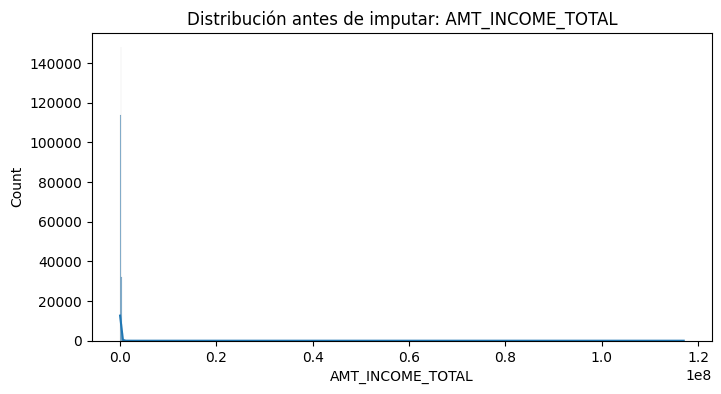

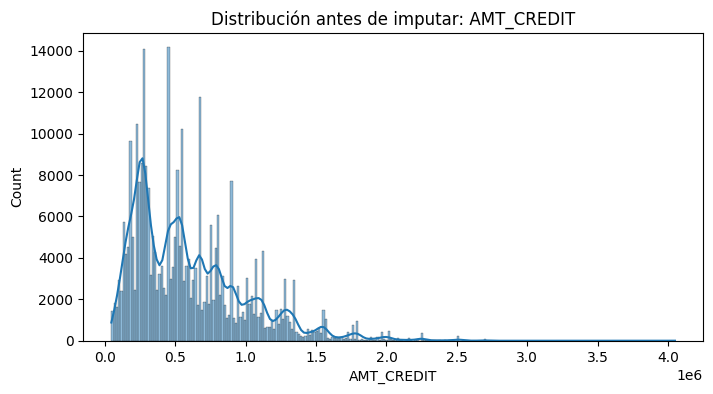

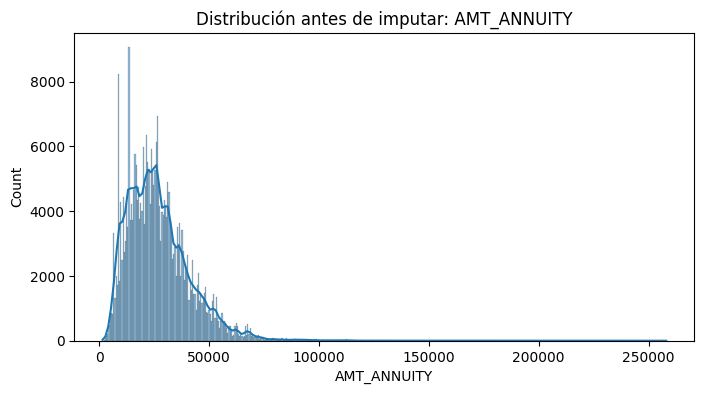

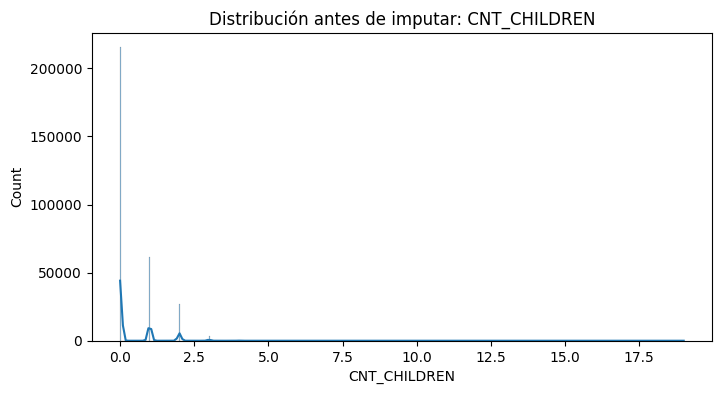

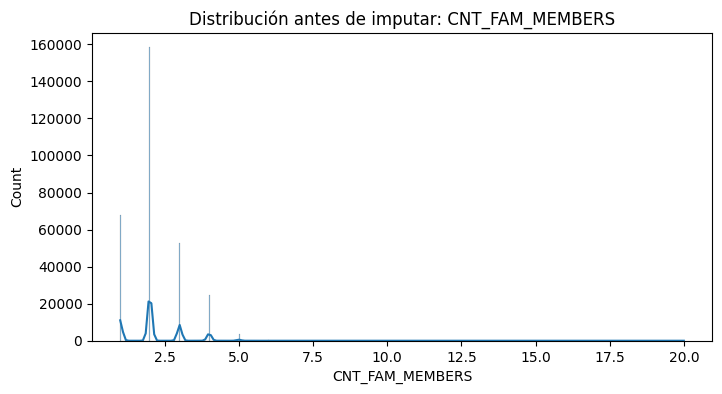

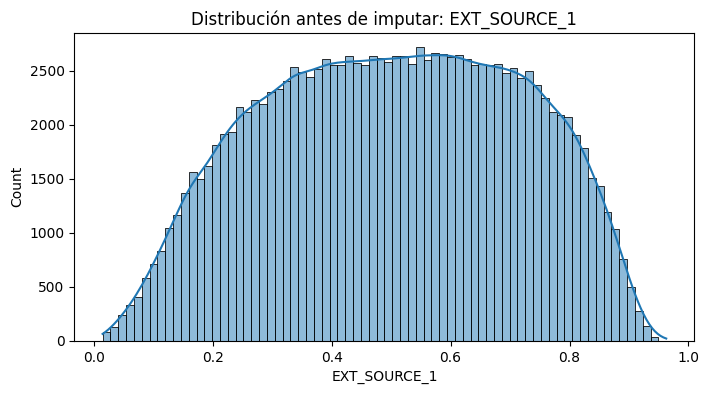

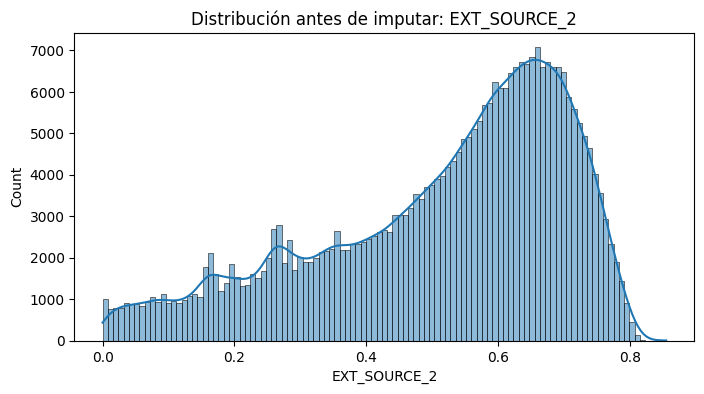

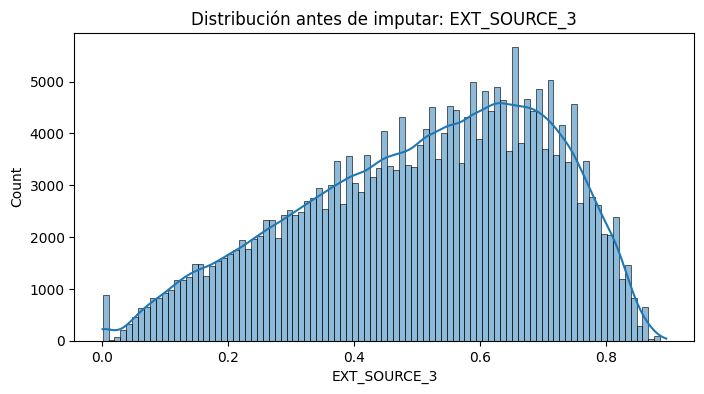

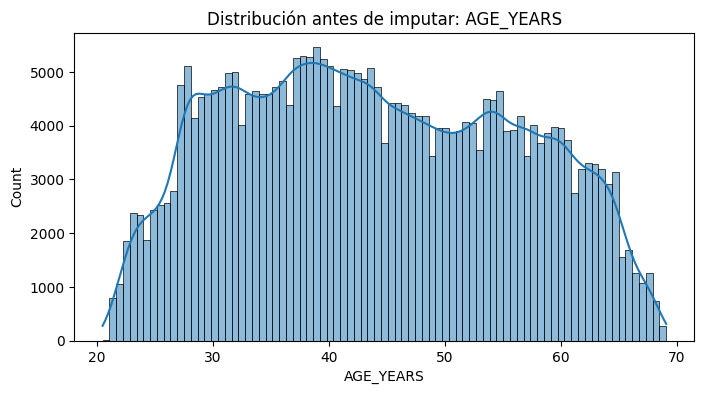

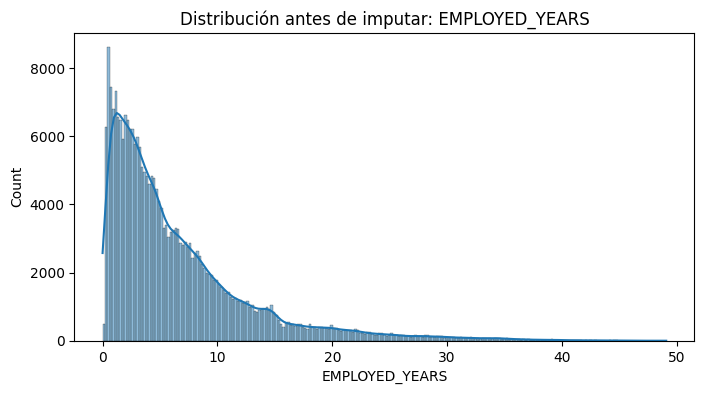

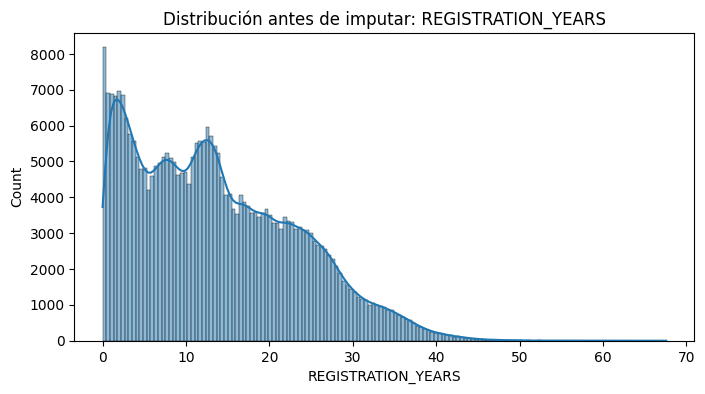

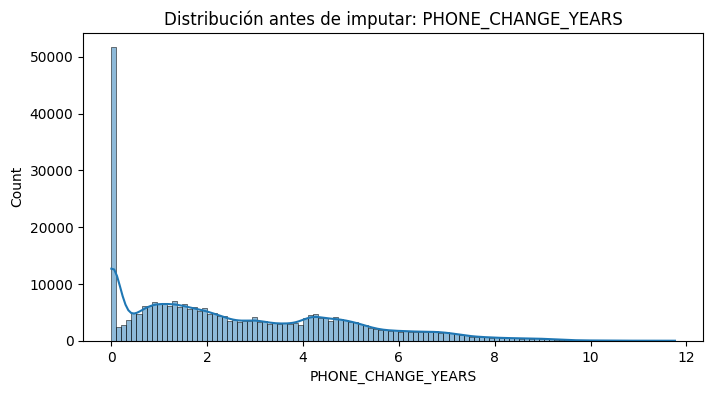


=== Proporción de nulos en cada variable según TARGET ===


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CNT_CHILDREN,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AGE_YEARS,EMPLOYED_YEARS,REGISTRATION_YEARS,PHONE_CHANGE_YEARS,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,NAME_FAMILY_STATUS
TARGET,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.004245,0.0,0.000707,56.107129,0.215080,19.558096,0.0,18.530808,0.0,0.000354,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,59.500504,0.209466,22.868077,0.0,12.044310,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0



=== Heatmap de patrones de nulos ===


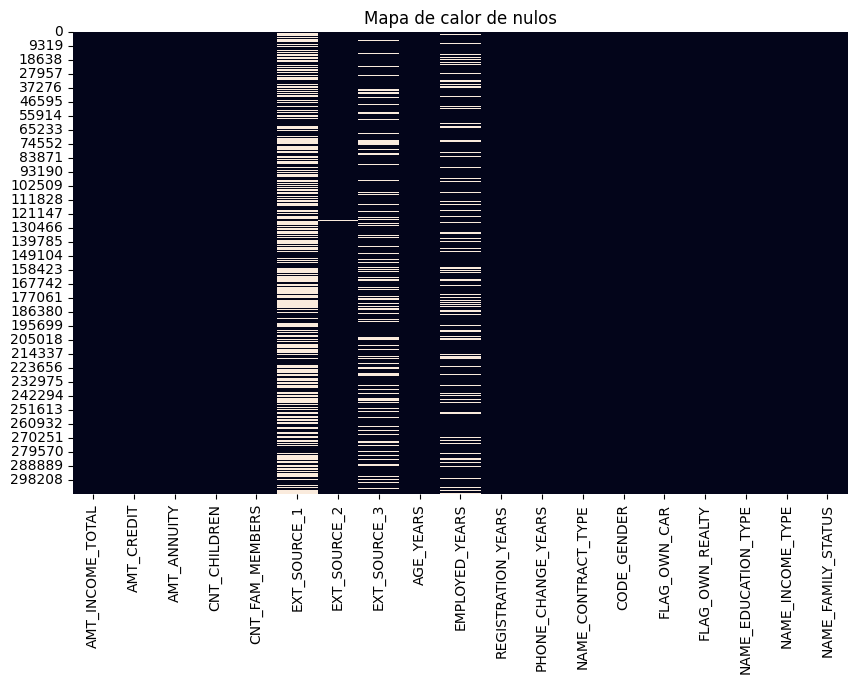

In [103]:
# Comprobación previa a imputación de nulos

# ============================
# 1. NULOS POR VARIABLE
# ============================

print("=== Cantidad de nulos por variable ===")
null_count = app[num_cols + cat_cols].isnull().sum().sort_values(ascending=False)
display(null_count)

print("\n=== Porcentaje de nulos por variable ===")
null_percent = (app[num_cols + cat_cols].isnull().mean() * 100).sort_values(ascending=False)
display(null_percent)


# ============================
# 2. DISTRIBUCIÓN ANTES DE IMPUTAR (NUMÉRICAS)
# ============================

print("\n=== Distribución de numéricas antes de imputar ===")

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(app[col], kde=True)
    plt.title(f"Distribución antes de imputar: {col}")
    plt.grid(False)
    plt.show()


# ============================
# 3. PRUEBA DE DEPENDENCIA DE LOS NULOS
#    (Si los nulos dependen de TARGET → peligro)
# ============================

if "TARGET" in app.columns:
    print("\n=== Proporción de nulos en cada variable según TARGET ===")
    null_by_target = app[num_cols + cat_cols].isnull().groupby(app["TARGET"]).mean() * 100
    display(null_by_target)
else:
    print("\nNo se puede hacer la prueba con TARGET porque no está en app.")


# ============================
# 4. HEATMAP DE PATRONES DE NULOS
# ============================

print("\n=== Heatmap de patrones de nulos ===")
plt.figure(figsize=(10,6))
sns.heatmap(app[num_cols + cat_cols].isnull(), cbar=False)
plt.title("Mapa de calor de nulos")
plt.show()


In [104]:
# Estrategia de imputación de nulos

# ======================================================
# - Las variables numéricas presentan distribuciones sesgadas (right-skew) 
#   y algunas contienen outliers intensos → usar la MEDIANA 
#
# - Las EXT_SOURCE_1, EXT_SOURCE_2 y EXT_SOURCE_3 tienen nulos dispersos sin 
#   patrones estructurados (comprobado en heatmap) y sin diferencia significativa 
#   entre TARGET=0 y TARGET=1 → seguro imputar con mediana.
#
# - DAYS_EMPLOYED corregido a EMPLOYED_YEARS mostró 18% nulos pero sin dependencia 
#   con TARGET → mediana es estable y no introduce sesgo.
#
# - Variables categóricas no presentan nulos relevantes → se usa MODA solo para 
#   reforzar consistencia. Moda es adecuada porque no hay nulos altos ni sesgos.
# ======================================================

# Imputación numérica con mediana
num_cols = [
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "CNT_CHILDREN",
    "CNT_FAM_MEMBERS",
    "EXT_SOURCE_1",
    "EXT_SOURCE_2",
    "EXT_SOURCE_3",
    "AGE_YEARS",
    "EMPLOYED_YEARS",
    "REGISTRATION_YEARS",
    "PHONE_CHANGE_YEARS"
]
# Justificación del uso de la mediana:
# - Distribuciones altamente sesgadas (confirmado en histogramas)
# - Resistencia a outliers
# - Nulos dispersos sin patrón (heatmap)
# - No dependencia de TARGET (comprobado en análisis de nulos por TARGET)
num_imputer = SimpleImputer(strategy="median")

app[num_cols] = num_imputer.fit_transform(app[num_cols])


# Imputación categórica con moda
cat_cols = [
    "NAME_CONTRACT_TYPE",
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "NAME_EDUCATION_TYPE",
    "NAME_INCOME_TYPE",
    "NAME_FAMILY_STATUS"
]

# Justificación del uso de la moda:
# - Las categóricas no presentan nulos significativos
# - La moda no distorsiona categorías dado que no hay desbalance extremo
# - Permite mantener consistencia sin introducir categorías artificiales
cat_imputer = SimpleImputer(strategy="most_frequent")

app[cat_cols] = cat_imputer.fit_transform(app[cat_cols])


# Verificación post-imputación
print("\nNulos restantes por columna:")
print(app[num_cols + cat_cols].isnull().sum())



Nulos restantes por columna:
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
CNT_CHILDREN           0
CNT_FAM_MEMBERS        0
EXT_SOURCE_1           0
EXT_SOURCE_2           0
EXT_SOURCE_3           0
AGE_YEARS              0
EMPLOYED_YEARS         0
REGISTRATION_YEARS     0
PHONE_CHANGE_YEARS     0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
NAME_EDUCATION_TYPE    0
NAME_INCOME_TYPE       0
NAME_FAMILY_STATUS     0
dtype: int64


In [105]:
# Revisión de cardinalidad de categóricas

print("Cardinalidad de variables categóricas:\n")
for col in cat_cols:
    print(f"{col}: {app[col].nunique()} categorías")
    print(app[col].value_counts())
    print("-" * 60)


Cardinalidad de variables categóricas:

NAME_CONTRACT_TYPE: 2 categorías
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
------------------------------------------------------------
CODE_GENDER: 3 categorías
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
------------------------------------------------------------
FLAG_OWN_CAR: 2 categorías
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
------------------------------------------------------------
FLAG_OWN_REALTY: 2 categorías
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
------------------------------------------------------------
NAME_EDUCATION_TYPE: 5 categorías
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64
--------------

In [108]:
# Agrupación de categorías raras

# CODE_GENDER: XNA → 'Unknown'
app["CODE_GENDER"] = app["CODE_GENDER"].replace({"XNA": "Unknown"})

# NAME_FAMILY_STATUS: Unknown → categoría 'Other_family'
app["NAME_FAMILY_STATUS"] = app["NAME_FAMILY_STATUS"].replace({"Unknown": "Other_family"})

# NAME_INCOME_TYPE: agrupar categorías muy pequeñas
rare_income = ["Unemployed", "Student", "Businessman", "Maternity leave"]
app["NAME_INCOME_TYPE"] = app["NAME_INCOME_TYPE"].replace(
    {cat: "Other_income" for cat in rare_income}
)

# NAME_EDUCATION_TYPE: agrupar categoría extremadamente rara
app["NAME_EDUCATION_TYPE"] = app["NAME_EDUCATION_TYPE"].replace(
    {"Academic degree": "Higher education"}
)

# Definimos el orden correcto (jerarquía educativa)
edu_order = [
    "Lower secondary",
    "Secondary / secondary special",
    "Incomplete higher",
    "Higher education"
]

ordinal_enc = OrdinalEncoder(categories=[edu_order])

# Nueva columna ordinal
app["EDU_LEVEL"] = ordinal_enc.fit_transform(app[["NAME_EDUCATION_TYPE"]])


# Variables categóricas NOMINALES (sin jerarquía)
cat_cols_encoding = [
    "NAME_CONTRACT_TYPE",
    "CODE_GENDER",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "NAME_INCOME_TYPE",
    "NAME_FAMILY_STATUS"
]

encoder = OneHotEncoder(
    drop="first",
    handle_unknown="ignore",
    sparse_output=False
)

# Ajustar y transformar solo variables nominales
encoded = encoder.fit_transform(app[cat_cols_encoding])

# Crear dataframe para las columnas OneHot
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(cat_cols_encoding),
    index=app.index
)


# Dataset final: numéricas + EDU_LEVEL (ordinal) + OHE

app_encoded = pd.concat([
    app[num_cols],       # variables numéricas ya imputadas
    app[["EDU_LEVEL"]],  # encoding ordinal
    encoded_df           # variables categóricas nominales codificadas
], axis=1)

print("Dimensiones finales después del encoding:", app_encoded.shape)
app_encoded.head()


Dimensiones finales después del encoding: (307511, 27)


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CNT_CHILDREN,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AGE_YEARS,EMPLOYED_YEARS,...,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Other_income,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Other_family,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
0,202500.0,406597.5,24700.5,0.0,1.0,0.083037,0.262949,0.139376,25.9,1.75,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,270000.0,1293502.5,35698.5,0.0,2.0,0.311267,0.622246,0.535276,45.9,3.25,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,0.0,1.0,0.505998,0.555912,0.729567,52.2,0.62,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,135000.0,312682.5,29686.5,0.0,2.0,0.505998,0.650442,0.535276,52.1,8.33,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,121500.0,513000.0,21865.5,0.0,1.0,0.505998,0.322738,0.535276,54.6,8.32,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0



=== StandardScaler Stats ===
                                                 mean       std       min  \
AMT_INCOME_TOTAL                        -1.229253e-17  1.000002 -0.603687   
AMT_CREDIT                              -4.545000e-17  1.000002 -1.376496   
AMT_ANNUITY                             -1.793045e-17  1.000002 -1.758933   
CNT_CHILDREN                            -4.815343e-17  1.000002 -0.577538   
CNT_FAM_MEMBERS                          2.458505e-16  1.000002 -1.265722   
EXT_SOURCE_1                             7.332077e-16  1.000002 -3.513017   
EXT_SOURCE_2                            -1.591559e-16  1.000002 -2.695574   
EXT_SOURCE_3                             1.293950e-17  1.000002 -2.948272   
AGE_YEARS                               -9.334927e-17  1.000002 -1.960260   
EMPLOYED_YEARS                           9.057652e-18  1.000002 -1.054228   
REGISTRATION_YEARS                       3.013056e-17  1.000002 -1.415353   
PHONE_CHANGE_YEARS                       4.122

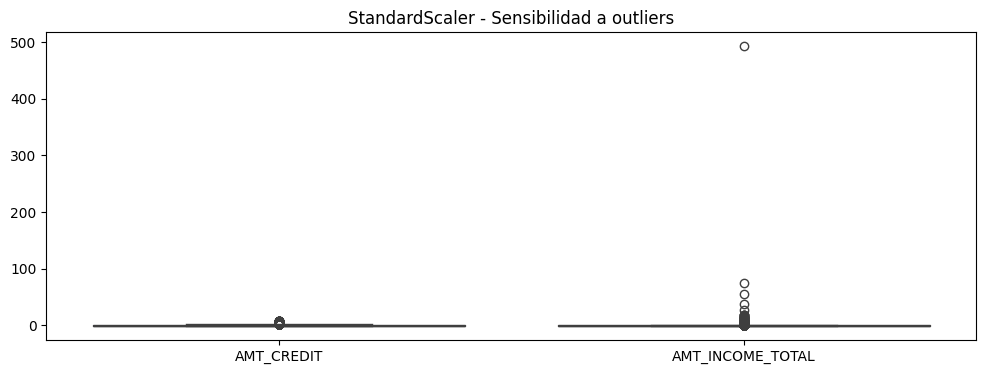

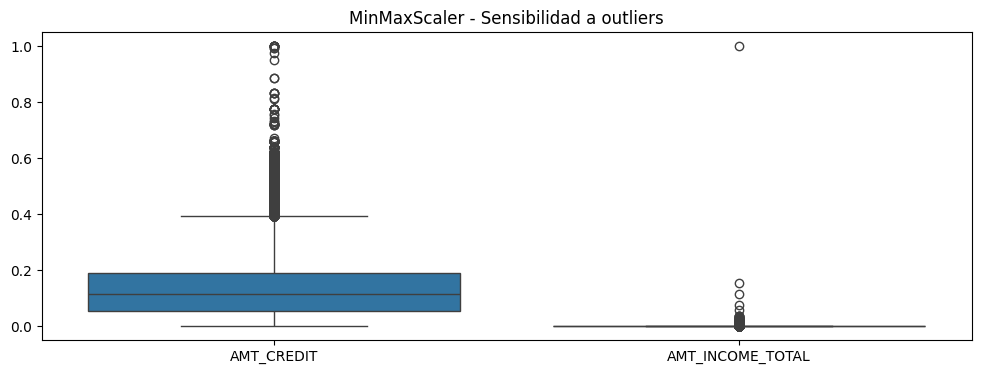


Inercia (KMeans) con StandardScaler: [7681607.766652503, 7170497.358933632, 6852213.535148034, 6587383.965298116]
Inercia (KMeans) con MinMaxScaler: [528827.0793701181, 479358.8528448882, 448217.52824523195, 408069.9223235721]


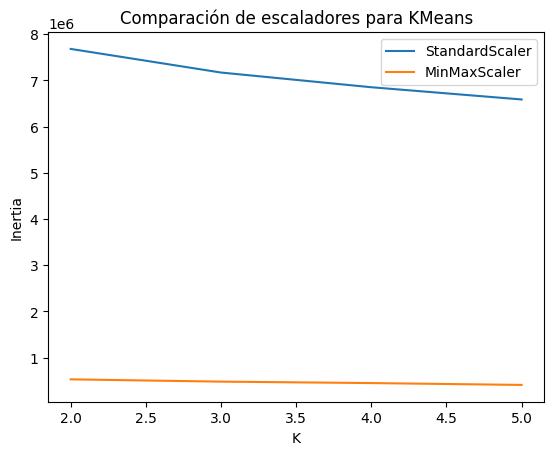

In [111]:
# Comparación de StandardScaler vs MinMaxScaler

# Dataset a comparar (solo numéricas + EDU_LEVEL)
X = app_encoded.copy()

# ------------------------------
# 1. Aplicar ambos escaladores
# ------------------------------

std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

X_std = pd.DataFrame(std_scaler.fit_transform(X), columns=X.columns)
X_minmax = pd.DataFrame(minmax_scaler.fit_transform(X), columns=X.columns)


# Comparación estadística

print("\n=== StandardScaler Stats ===")
print(X_std.describe().T[['mean','std','min','max']])

print("\n=== MinMaxScaler Stats ===")
print(X_minmax.describe().T[['mean','std','min','max']])


# Sensibilidad a outliers

plt.figure(figsize=(12,4))
sns.boxplot(data=X_std[['AMT_CREDIT','AMT_INCOME_TOTAL']])
plt.title("StandardScaler - Sensibilidad a outliers")
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(data=X_minmax[['AMT_CREDIT','AMT_INCOME_TOTAL']])
plt.title("MinMaxScaler - Sensibilidad a outliers")
plt.show()


# Comparación de inercia en KMeans

def inertia_for(X_scaled):
    inertias = []
    for k in range(2,6):
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(X_scaled)
        inertias.append(km.inertia_)
    return inertias

inertia_std = inertia_for(X_std)
inertia_minmax = inertia_for(X_minmax)

print("\nInercia (KMeans) con StandardScaler:", inertia_std)
print("Inercia (KMeans) con MinMaxScaler:", inertia_minmax)

# Gráfico comparativo
plt.plot(range(2,6), inertia_std, label="StandardScaler")
plt.plot(range(2,6), inertia_minmax, label="MinMaxScaler")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Comparación de escaladores para KMeans")
plt.legend()
plt.show()

In [112]:
# Escalado final con MinMaxScaler

# Todas estas variables son sensibles a rango y escala.
# MinMaxScaler mantiene las distribuciones, evita explosiones
# y fue superior en KMeans (menor inercia ≈ clusters más estables).

features_to_scale = app_encoded.columns.tolist()

# Crear instancia del escalador
scaler = MinMaxScaler()

# MinMaxScaler fue más robusto ante outliers
# (boxplots mostraron estabilidad), y mejoró drásticamente
# la inercia en KMeans, lo que indica clusters más compactos.
app_scaled = scaler.fit_transform(app_encoded)

# Convertimos a dataframe para mantener nombres de columnas
app_scaled = pd.DataFrame(app_scaled, columns=features_to_scale, index=app_encoded.index)

# --- 3. Verificación ---
print("\n=== Dataset escalado con MinMaxScaler ===")
print(app_scaled.head())

print("\nRango general tras MinMaxScaler (debería ser 0–1):")
print(app_scaled.describe().loc[["min", "max"]])



=== Dataset escalado con MinMaxScaler ===
   AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  CNT_CHILDREN  CNT_FAM_MEMBERS  \
0          0.001512    0.090287     0.090032           0.0         0.000000   
1          0.002089    0.311736     0.132924           0.0         0.052632   
2          0.000358    0.022472     0.020025           0.0         0.000000   
3          0.000935    0.066837     0.109477           0.0         0.052632   
4          0.000819    0.116854     0.078975           0.0         0.000000   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  AGE_YEARS  EMPLOYED_YEARS  ...  \
0      0.072215      0.307542      0.155054   0.111111        0.035663  ...   
1      0.312933      0.727773      0.597163   0.522634        0.066232  ...   
2      0.518318      0.650190      0.814130   0.652263        0.012635  ...   
3      0.518318      0.760751      0.597163   0.650206        0.169757  ...   
4      0.518318      0.377472      0.597163   0.701646        0.169554  ...   

   FLAG